<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means Bad Cases

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sbn

In [2]:
## Create data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [3]:
## Convert data into a DataFrame

# Declare the columns names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [4]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean     0.002634   -0.002554
std      0.524565    0.521521
min     -1.069173   -1.074933
25%     -0.290209   -0.298216
50%      0.016692    0.002812
75%      0.295212    0.299631
max      1.133798    1.051235

Sample of X__________________________________________________
          A         B
0  0.187148 -0.256764
1  0.160028  0.260295
2 -0.876129 -0.331068
3 -0.305383  0.200685
4 -0.934672 -0.413033


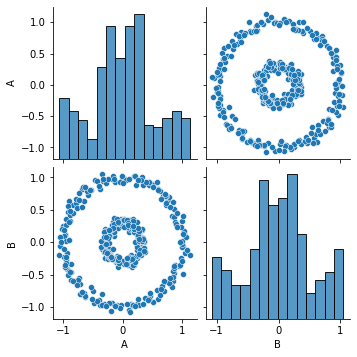

In [5]:
sbn.pairplot(X)
plt.show()

### Run the Algoritm: Choose K


In [6]:
def print_centroids(centroids):
    global step
    if show_steps:
        print('(Step) Step %d' % step)
        for c in centroids:
            print(', '.join(['%.3f' % f for f in c]))
        step += 1

In [7]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)
        
        print_centroids(centroids)

    return centroids

In [8]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( ( (p - q) ** 2 ).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [9]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])
            
    print_centroids(centroids)

    return c

In [10]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    for i in range(len(centroids)):
        for s in range(step + 1):
            e = [z[i][0] for z in centroids_list]
            f = [z[i][1] for z in centroids_list]
            ax.plot(e, f, c = 'k', marker = '+', linewidth = 1)

        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    
    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [11]:
## Flag intermediate output

step = 0
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

(Step) Step 0
0.044, 0.752
(Step) Step 1
0.044, 0.752
-0.979, -0.083
(Step) Step 2
0.044, 0.752
-0.979, -0.083
1.060, 0.462
(Step) Step 3
0.044, 0.752
-0.979, -0.083
1.060, 0.462
(Step) Step 4
0.056, 0.295
-0.425, -0.297
0.796, -0.120
(Step) Step 5
0.028, 0.372
-0.377, -0.339
0.758, -0.206
(Step) Step 6
-0.013, 0.456
-0.337, -0.361
0.667, -0.228
(Step) Step 7
-0.043, 0.486
-0.354, -0.363
0.596, -0.221
(Step) Step 8
-0.053, 0.500
-0.380, -0.362
0.554, -0.218
(Step) Step 9
-0.062, 0.510
-0.387, -0.358
0.538, -0.211
(Step) Step 10
-0.069, 0.517
-0.398, -0.361
0.520, -0.203
(Step) Step 11
-0.072, 0.519
-0.412, -0.362
0.504, -0.203
(Step) Step 12
-0.072, 0.519
-0.424, -0.358
0.495, -0.211
(Step) Step 13
-0.059, 0.522
-0.448, -0.343
0.483, -0.219
(Step) Step 14
-0.053, 0.522
-0.452, -0.338
0.478, -0.231
(Step) Step 15
-0.053, 0.522
-0.465, -0.326
0.469, -0.243
(Step) Step 16
-0.049, 0.523
-0.472, -0.317
0.464, -0.252
(Step) Step 17
-0.043, 0.523
-0.472, -0.317
0.462, -0.258
(Step) Step 18
-0

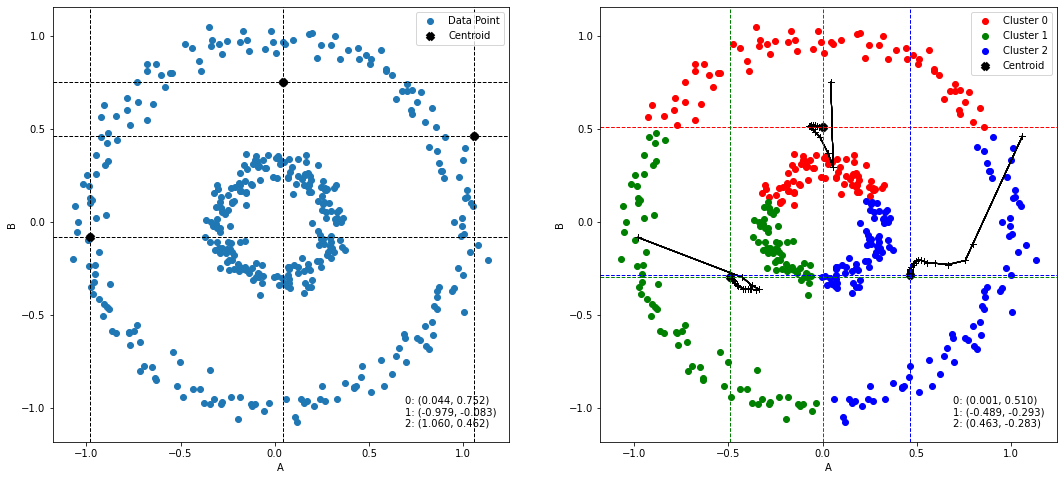

In [12]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 3 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

(Step) Step 24
0.692, 0.356
(Step) Step 25
0.692, 0.356
-0.268, 0.624
(Step) Step 26
0.692, 0.356
-0.268, 0.624
(Step) Step 27
0.431, -0.120
-0.370, 0.100
(Step) Step 28
0.423, -0.101
-0.386, 0.089
(Step) Step 29
0.419, -0.092
-0.394, 0.082
(Step) Step 30
0.413, -0.082
-0.404, 0.076
(Step) Step 31
0.414, -0.075
-0.405, 0.069
(Step) Step 32
0.416, -0.065
-0.407, 0.059
(Step) Step 33
0.415, -0.059
-0.410, 0.054
(Step) Step 34
0.413, -0.058
-0.412, 0.053


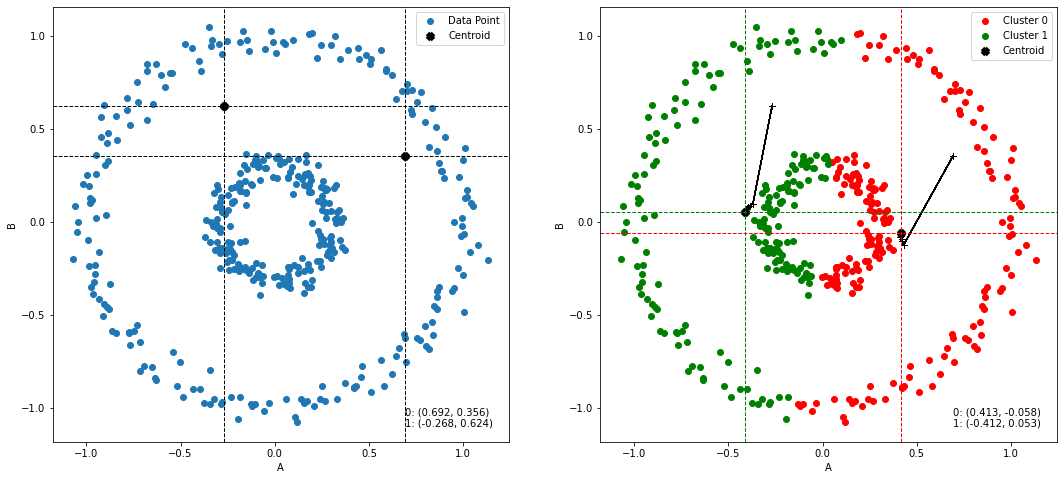

In [13]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 2 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

(Step) Step 35
-0.093, -0.448
(Step) Step 36
-0.093, -0.448
0.735, -0.561
(Step) Step 37
-0.093, -0.448
0.735, -0.561
-0.202, -0.693
(Step) Step 38
-0.093, -0.448
0.735, -0.561
-0.202, -0.693
-0.755, 0.403
(Step) Step 39
-0.093, -0.448
0.735, -0.561
-0.202, -0.693
-0.755, 0.403
(Step) Step 40
0.035, -0.050
0.790, -0.105
-0.380, -0.822
-0.388, 0.485
(Step) Step 41
0.026, -0.032
0.826, -0.044
-0.394, -0.759
-0.371, 0.586
(Step) Step 42
0.013, -0.013
0.837, -0.019
-0.384, -0.743
-0.390, 0.661
(Step) Step 43
0.009, -0.005
0.833, -0.004
-0.394, -0.732
-0.411, 0.692
(Step) Step 44
0.008, -0.003
0.823, 0.022
-0.394, -0.732
-0.442, 0.692
(Step) Step 45
0.008, -0.003
0.823, 0.047
-0.382, -0.733
-0.457, 0.689
(Step) Step 46
0.008, -0.003
0.818, 0.059
-0.371, -0.743
-0.479, 0.675
(Step) Step 47
0.008, -0.003
0.816, 0.086
-0.357, -0.745
-0.493, 0.671


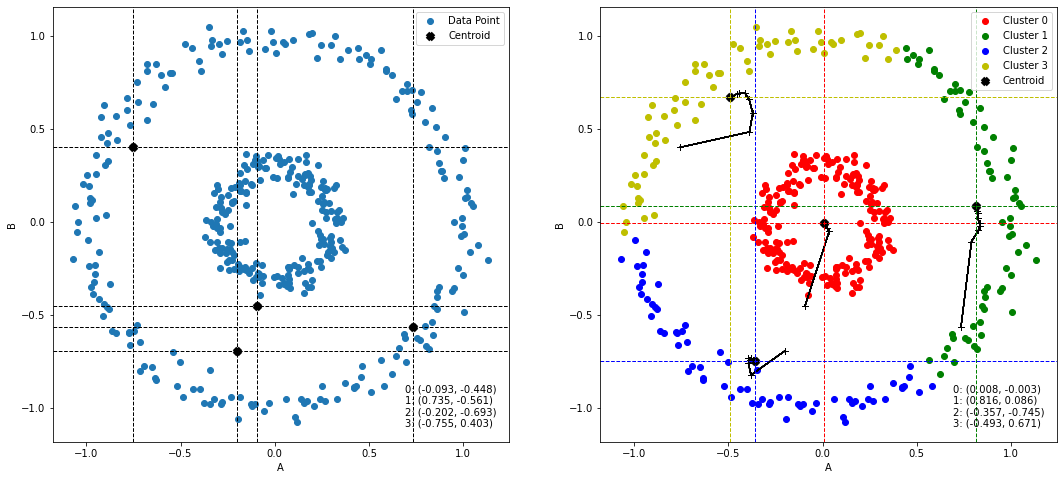

In [14]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 4 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

(Step) Step 48
0.456, 0.010
(Step) Step 49
0.456, 0.010
0.970, -0.889
(Step) Step 50
0.456, 0.010
0.970, -0.889
0.578, 0.252
(Step) Step 51
0.456, 0.010
0.970, -0.889
0.578, 0.252
0.678, -0.225
(Step) Step 52
0.456, 0.010
0.970, -0.889
0.578, 0.252
0.678, -0.225
-0.436, -0.924
(Step) Step 53
0.456, 0.010
0.970, -0.889
0.578, 0.252
0.678, -0.225
-0.436, -0.924
0.614, -0.324
(Step) Step 54
0.456, 0.010
0.970, -0.889
0.578, 0.252
0.678, -0.225
-0.436, -0.924
0.614, -0.324
(Step) Step 55
-0.048, 0.043
0.624, -0.773
0.286, 0.720
0.980, -0.182
-0.567, -0.517
0.554, -0.591
(Step) Step 56
-0.060, 0.045
0.428, -0.850
0.146, 0.850
0.958, -0.014
-0.707, -0.495
0.506, -0.485
(Step) Step 57
-0.057, 0.042
0.247, -0.920
0.025, 0.864
0.952, 0.106
-0.776, -0.411
0.510, -0.380
(Step) Step 58
-0.029, 0.026
0.111, -0.944
-0.141, 0.871
0.901, 0.284
-0.837, -0.270
0.517, -0.370
(Step) Step 59
-0.020, 0.020
0.023, -0.939
-0.197, 0.868
0.873, 0.355
-0.877, -0.209
0.558, -0.391
(Step) Step 60
-0.009, 0.011
-0.

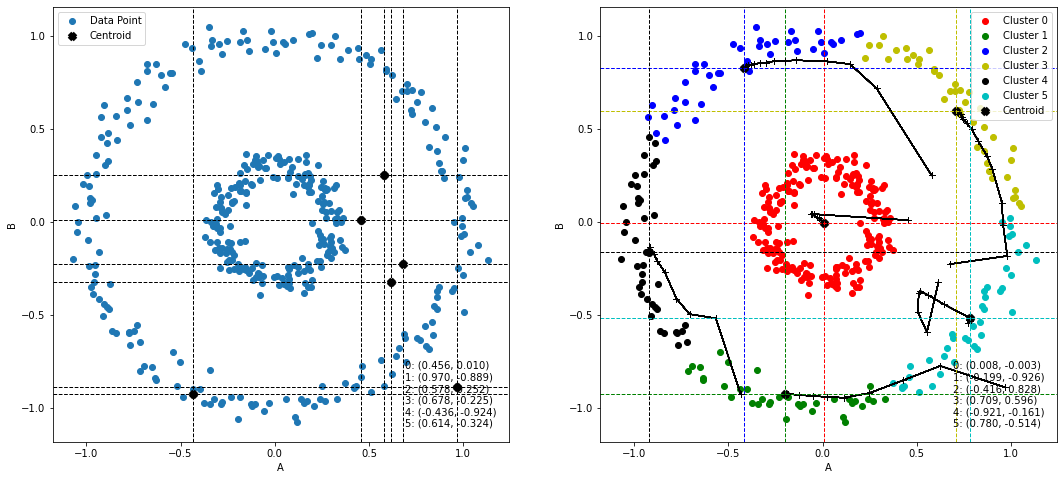

In [15]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 6 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



